In [2]:
import glob
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

In [3]:
def extract_device_info(filename: str):
    """Extract the IoT device type and its corresponding number from the filename."""
    match = re.match(r"([a-zA-Z\-]+)-([0-9]+)", filename)
    if match:
        return match.group(1), match.group(2)  # (device_name, device_number)
    return None, None


def load_metadata(metadata_file: str):
    """Load metadata rules from a JSON file."""
    with open(metadata_file, 'r') as f:
        return json.load(f)

In [10]:
filenames_malicious = glob.glob("../*/labelled/malicious/*/*.csv")
filenames_normal = glob.glob("../*/extracted_features/normal/*.csv")

In [69]:
devices = ['iotsim-combined-cycle-tls-5',
'iotsim-domotic-monitor-1',
'iotsim-combined-cycle-tls-4',
'iotsim-predictive-maintenance-6',
'iotsim-predictive-maintenance-7',
'iotsim-hydraulic-system-6',
'iotsim-combined-cycle-8',
'iotsim-cooler-motor-3',
'iotsim-combined-cycle-5',
'iotsim-combined-cycle-9',
'iotsim-hydraulic-system-7',
'iotsim-cooler-motor-2',
'iotsim-combined-cycle-4',
'iotsim-hydraulic-system-13',
'iotsim-cooler-motor-15',
'iotsim-ip-camera-street-2',
'iotsim-hydraulic-system-12',
'iotsim-cooler-motor-14',
'iotsim-predictive-maintenance-11',
'iotsim-predictive-maintenance-1',
'iotsim-stream-consumer-1',
'iotsim-building-monitor-1',
'iotsim-combined-cycle-tls-2',
'iotsim-combined-cycle-tls-3',
'iotsim-cooler-motor-12',
'iotsim-hydraulic-system-14',
'iotsim-cooler-motor-13',
'iotsim-hydraulic-system-15',
'iotsim-cooler-motor-10',
'iotsim-combined-cycle-2',
'iotsim-cooler-motor-9',
'iotsim-cooler-motor-4',
'iotsim-hydraulic-system-1',
'iotsim-combined-cycle-3',
'iotsim-cooler-motor-8',
'iotsim-cooler-motor-5',
'iotsim-ip-camera-museum-2',
'iotsim-combined-cycle-7',
'iotsim-hydraulic-system-9',
'iotsim-combined-cycle-10',
'iotsim-hydraulic-system-4',
'iotsim-cooler-motor-1',
'iotsim-hydraulic-system-8',
'iotsim-combined-cycle-6',
'iotsim-hydraulic-system-5',
'iotsim-hydraulic-system-11',
'iotsim-ip-camera-street-1',
'iotsim-building-monitor-4',
'iotsim-domotic-monitor-3',
'iotsim-building-monitor-5',
'iotsim-domotic-monitor-2',
'iotsim-predictive-maintenance-14',
'iotsim-predictive-maintenance-4',
'iotsim-predictive-maintenance-9',
'iotsim-predictive-maintenance-5',
'iotsim-predictive-maintenance-15',
'iotsim-predictive-maintenance-8',
'iotsim-hydraulic-system-10',
'iotsim-cooler-motor-11',
'iotsim-predictive-maintenance-10',
'iotsim-ip-camera-museum-1',
'iotsim-cooler-motor-6',
'iotsim-hydraulic-system-3',
'iotsim-cooler-motor-7',
'iotsim-hydraulic-system-2',
'iotsim-air-quality-1',
'iotsim-combined-cycle-1',
'iotsim-predictive-maintenance-13',
'iotsim-predictive-maintenance-3',
'iotsim-predictive-maintenance-2',
'iotsim-predictive-maintenance-12',
'iotsim-domotic-monitor-4',
'iotsim-city-power-1',
'iotsim-building-monitor-3',
'iotsim-domotic-monitor-5',
'iotsim-combined-cycle-tls-1',
'iotsim-building-monitor-2',
'iotsim-stream-consumer-2']

In [48]:
dfs = []

normal_metadata_file = '../metadata/metadata-normal.json'
normal_metadata = load_metadata(normal_metadata_file)

for device in devices:
    device_name, device_number = extract_device_info(device)
    device_number = int(device_number) - 1  # Convert to index (0-based)

    # Get the device IP address from the normal metadata
    device_ip_address = normal_metadata.get(device_name, {}).get("device_ip", [])[device_number]

    filenames_malicious = glob.glob(f"../*/labelled/malicious/*/{device}*.csv")
    filenames_normal = glob.glob(f"../*/extracted_features/normal/{device}*.csv")

    df_normal = pd.concat([pd.read_csv(filename, sep=";", low_memory=False) for filename in filenames_normal])
    df_normal['label'] = 'Normal'
    df_normal['ip.src'] = df_normal['ip.src'].fillna('')
    df_normal['ip.dst'] = df_normal['ip.dst'].fillna('')
    mask = np.logical_or(df_normal["ip.src"].str.match(device_ip_address), df_normal["ip.dst"].str.match(device_ip_address))
    df_normal = df_normal[mask]

    if len(filenames_malicious) > 0:
        df_malicious = pd.concat([pd.read_csv(filename, sep=";", low_memory=False) for filename in filenames_malicious])    
        df = pd.concat([df_malicious, df_normal])
    else:
        df = df_normal
    
    dfs.append({"device_name": device, "data": df})


In [53]:
attacks = ["Mirai TCP Flooding", "Mirai UDP Flooding", "Mirai GRE Flooding", "TCP Scan", "Telnet Brute Force ", "Merlin TCP Flooding",
           "Normal", "Unknown", "File Download", "Merlin UDP Flooding", "Ingress Tool Transfer", "Merlin ICMP Flooding",
           "C&C Communication", "Reporting"]

In [83]:
y = [df['device_name'] for df in dfs]
x = [df['data'][(df['data'].label == 'Normal')].shape[0] for df in dfs]

In [ ]:
x.remove()

In [82]:
for v in ['iotsim-ip-camera-street-1', 'iotsim-ip-camera-museum-1', 'iotsim-ip-camera-street-2', 'iotsim-ip-camera-museum-2']:
    y.remove(v)
    x.remove(y.index(v))

ValueError: list.remove(x): x not in list

In [85]:
y

['iotsim-combined-cycle-tls-5',
 'iotsim-domotic-monitor-1',
 'iotsim-combined-cycle-tls-4',
 'iotsim-predictive-maintenance-6',
 'iotsim-predictive-maintenance-7',
 'iotsim-hydraulic-system-6',
 'iotsim-combined-cycle-8',
 'iotsim-cooler-motor-3',
 'iotsim-combined-cycle-5',
 'iotsim-combined-cycle-9',
 'iotsim-hydraulic-system-7',
 'iotsim-cooler-motor-2',
 'iotsim-combined-cycle-4',
 'iotsim-hydraulic-system-13',
 'iotsim-cooler-motor-15',
 'iotsim-ip-camera-street-2',
 'iotsim-hydraulic-system-12',
 'iotsim-cooler-motor-14',
 'iotsim-predictive-maintenance-11',
 'iotsim-predictive-maintenance-1',
 'iotsim-stream-consumer-1',
 'iotsim-building-monitor-1',
 'iotsim-combined-cycle-tls-2',
 'iotsim-combined-cycle-tls-3',
 'iotsim-cooler-motor-12',
 'iotsim-hydraulic-system-14',
 'iotsim-cooler-motor-13',
 'iotsim-hydraulic-system-15',
 'iotsim-cooler-motor-10',
 'iotsim-combined-cycle-2',
 'iotsim-cooler-motor-9',
 'iotsim-cooler-motor-4',
 'iotsim-hydraulic-system-1',
 'iotsim-combine

<Axes: >

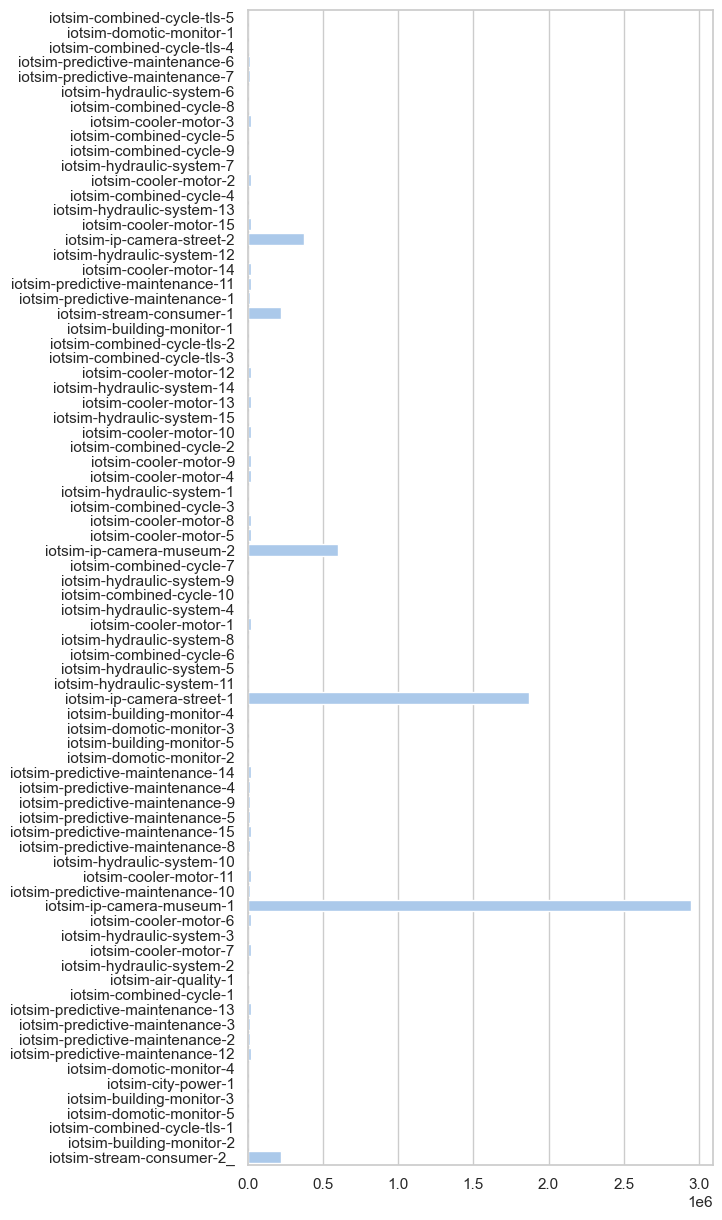

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x=x, y=y, color="b")